In [1]:
%cd ..

/home/dani2442/Projects/bifurcationjax


In [2]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt

from bifurcationjax.continuation.Corrector import NaturalCorrector
from bifurcationjax.continuation.Predictor import TangentPredictor
from bifurcationjax.continuation.Continuation import continuation
from bifurcationjax.BifurcationProblem import BifurcationProblem

In [3]:
@jax.jit
def F(x, p):
    return p + x - x**3/3

In [4]:
p_min = -1
p_max = 1
p0 = -1
x0 = jnp.array([-2.])

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [1]:
prob = BifurcationProblem(F, x0, p0,)
correction = NaturalCorrector()
prediction = TangentPredictor()
xs, ps, stability, eigenvalues, tps = continuation(prob, prediction, correction, p_min, p_max, dsmax=0.01)

NameError: name 'BifurcationProblem' is not defined

In [6]:
dict_color = {'bp':0, 'hopf':1, 'nd':2}

In [7]:
cmap = plt.get_cmap()

/tmp/ipykernel_43908/2350278949.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(p,x[0], c=cmap(dict_color[tp]), label=tp)


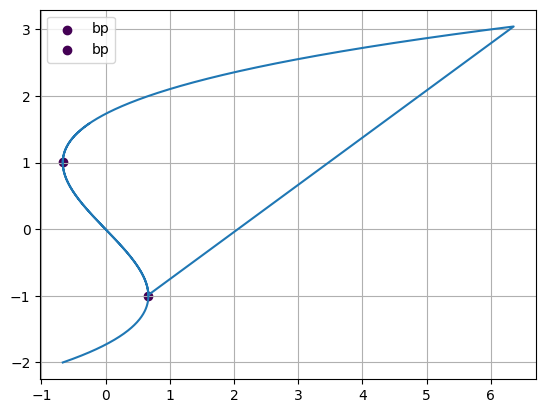

In [10]:
fig, ax = plt.subplots()
for tp, p, x in zip(tps, ps, xs):
    if tp is not None:
        ax.scatter(p,x[0], c=cmap(dict_color[tp]), label=tp)
ax.plot(ps[:1500], [x[0] for i, x in enumerate(xs) if i<1500])
plt.grid()
plt.legend()
plt.show()

ValueError: 'c' argument has 633 elements, which is inconsistent with 'x' and 'y' with size 2635.

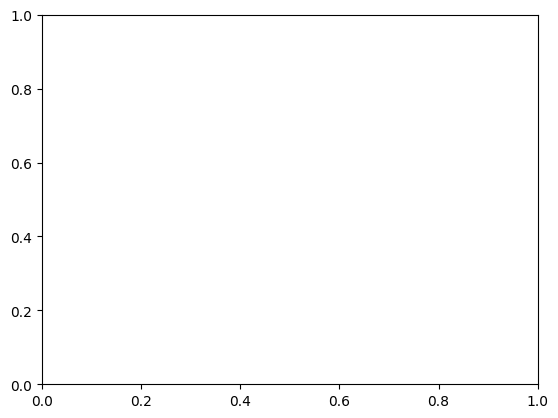

In [9]:
colors = ["blue" if s else "red" for s in stability]

plt.scatter(ps, [x[0] for x in xs], c=colors)
plt.grid()
plt.show()